In [1]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.io import output_notebook
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
output_notebook()
df = pd.read_csv('../data/central_park_weather_data.csv', dtype='object')

Loading BokehJS ...

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['weekday'] = df.DATE.dt.weekday
df['week'] = df.DATE.dt.week
df['month'] = df.DATE.dt.month
df = df[df.DATE >= '20010101']
df['TMAX'] = df['TMAX'].astype('int')
df['TMIN'] = df['TMIN'].astype('int')
df['weekday'] = df.DATE.dt.weekday
df['month'] = df.DATE.dt.month
df['week'] = df.DATE.dt.week
df.head()


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,...,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,weekday,week,month
48212,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
48213,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
48214,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1
48215,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1
48216,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-05,NaN,NaN,NaN,NaN,...,",,0",NaN,NaN,NaN,NaN,1,",,X",4,1,1


In [4]:
df.columns[~df.isnull().any()].tolist()

['STATION',
 'NAME',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'DATE',
 'PRCP',
 'PRCP_ATTRIBUTES',
 'TMAX',
 'TMAX_ATTRIBUTES',
 'TMIN',
 'TMIN_ATTRIBUTES',
 'weekday',
 'week',
 'month']

In [5]:
df = df[df.columns[~df.isnull().any()]]

In [6]:
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,weekday,week,month
48212,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-01,0.00,",,0,2400",32,",,0",23,",,0",0,1,1
48213,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-02,0.00,",,0,2400",27,",,0",19,",,0",1,1,1
48214,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-03,0.00,",,0,2400",31,",,0",18,",,0",2,1,1
48215,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-04,0.00,",,0,2400",34,",,0",25,",,0",3,1,1
48216,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-05,0.19,",,0,2400",33,",,0",24,",,0",4,1,1


             TMAX      TMIN   weekday      week     month
TMAX     1.000000  0.957780 -0.009762  0.262122  0.261765
TMIN     0.957780  1.000000 -0.008092  0.320678  0.320530
weekday -0.009762 -0.008092  1.000000  0.000174  0.000501
week     0.262122  0.320678  0.000174  1.000000  0.971628
month    0.261765  0.320530  0.000501  0.971628  1.000000


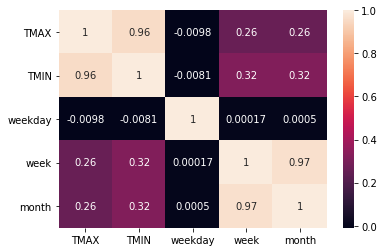

In [7]:
corr = df.corr()
print(corr)
sns.heatmap(corr, annot=True) 

In [8]:
source = ColumnDataSource(df)
p_max = figure(plot_width=1200, plot_height=400)
p_max.circle(x='DATE', y='TMAX', source=source, size=10)
show(p_max)

In [9]:
p_min = figure(plot_width=1200, plot_height=400)
p_min.circle(x='DATE', y='TMIN', source=source, size=10)
show(p_min)